In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("procrastination_behavior_dataset.csv")
df.head()


,task_type,task_priority,day_of_week,mood,energy,stress,used_social_media,post_social_feeling,procrastinated
0,Fitness,2,Wednesday,4,2,1,1,3,1
1,Creative,3,Friday,1,3,4,0,5,1
2,Personal,1,Saturday,1,3,2,0,2,0
3,Creative,1,Monday,5,5,2,1,2,1
4,Creative,4,Friday,4,5,5,1,5,0


In [3]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   task_type            200 non-null    object
 1   task_priority        200 non-null    int64 
 2   day_of_week          200 non-null    object
 3   mood                 200 non-null    int64 
 4   energy               200 non-null    int64 
 5   stress               200 non-null    int64 
 6   used_social_media    200 non-null    int64 
 7   post_social_feeling  200 non-null    int64 
 8   procrastinated       200 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 14.2+ KB


,task_priority,mood,energy,stress,used_social_media,post_social_feeling,procrastinated
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2.920000,3.045000,2.935000,2.965000,0.600000,3.070000,0.605000
std,1.411938,1.464136,1.439142,1.408437,0.491127,1.426631,0.490077
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,0.000000,2.000000,0.000000
50%,3.000000,3.000000,3.000000,3.000000,1.000000,3.000000,1.000000
75%,4.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,1.000000,5.000000,1.000000


In [4]:
df.isnull().sum()


task_type              0
task_priority          0
day_of_week            0
mood                   0
energy                 0
stress                 0
used_social_media      0
post_social_feeling    0
procrastinated         0
dtype: int64

In [5]:
df['task_type'] = df['task_type'].str.lower()
df['day_of_week'] = df['day_of_week'].str.lower()


In [6]:
df_encoded = pd.get_dummies(df, columns=['task_type', 'day_of_week'], drop_first=True)
df_encoded.head()


,task_priority,mood,energy,stress,used_social_media,post_social_feeling,procrastinated,task_type_fitness,task_type_personal,task_type_study,task_type_work,day_of_week_monday,day_of_week_saturday,day_of_week_sunday,day_of_week_thursday,day_of_week_tuesday,day_of_week_wednesday
0,2,4,2,1,1,3,1,True,False,False,False,False,False,False,False,False,True
1,3,1,3,4,0,5,1,False,False,False,False,False,False,False,False,False,False
2,1,1,3,2,0,2,0,False,True,False,False,False,True,False,False,False,False
3,1,5,5,2,1,2,1,False,False,False,False,True,False,False,False,False,False
4,4,4,5,5,1,5,0,False,False,False,False,False,False,False,False,False,False


In [7]:
X = df_encoded.drop("procrastinated", axis=1)
y = df_encoded["procrastinated"]


In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [10]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.56      0.82      0.67        11
           1       0.92      0.76      0.83        29

    accuracy                           0.78        40
   macro avg       0.74      0.79      0.75        40
weighted avg       0.82      0.78      0.79        40



In [11]:
df['procrastinated'].value_counts()


procrastinated
1    121
0     79
Name: count, dtype: int64

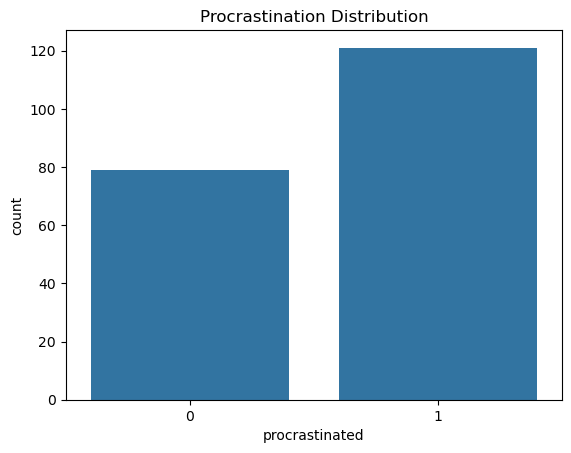

In [12]:
sns.countplot(x='procrastinated', data=df)
plt.title("Procrastination Distribution")
plt.show()


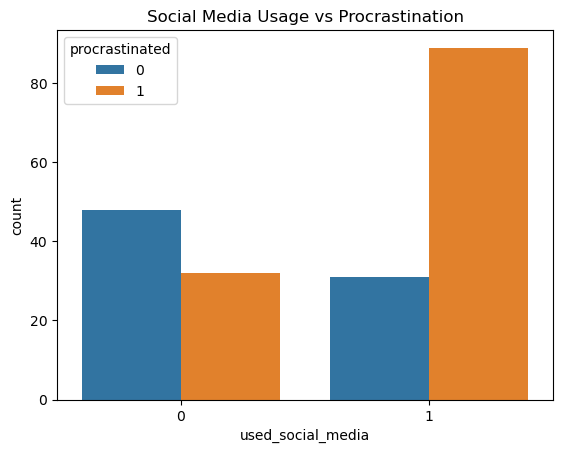

In [13]:
sns.countplot(x='used_social_media', hue='procrastinated', data=df)
plt.title("Social Media Usage vs Procrastination")
plt.show()


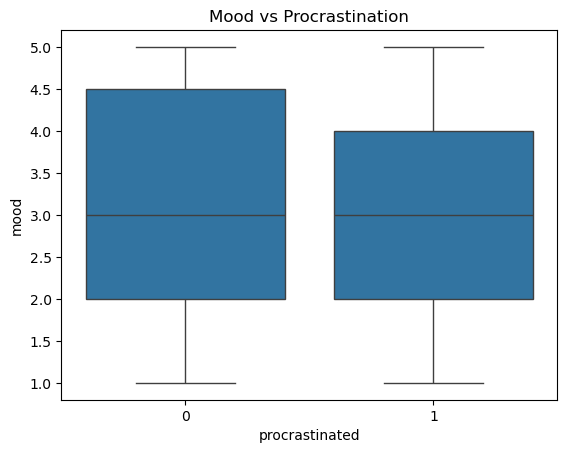

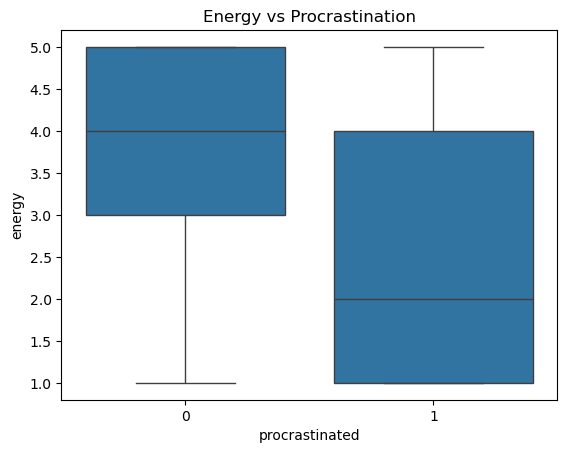

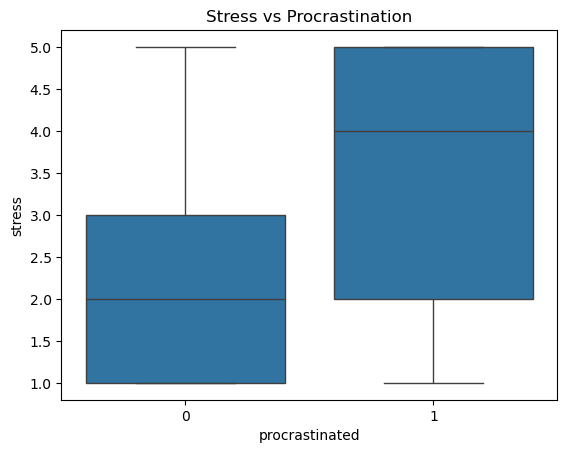

In [14]:
emotion_cols = ['mood', 'energy', 'stress']

for col in emotion_cols:
    sns.boxplot(x='procrastinated', y=col, data=df)
    plt.title(f"{col.capitalize()} vs Procrastination")
    plt.show()


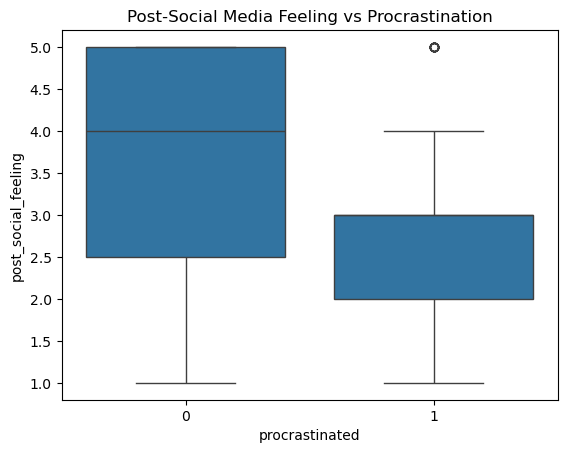

In [15]:
sns.boxplot(x='procrastinated', y='post_social_feeling', data=df)
plt.title("Post-Social Media Feeling vs Procrastination")
plt.show()


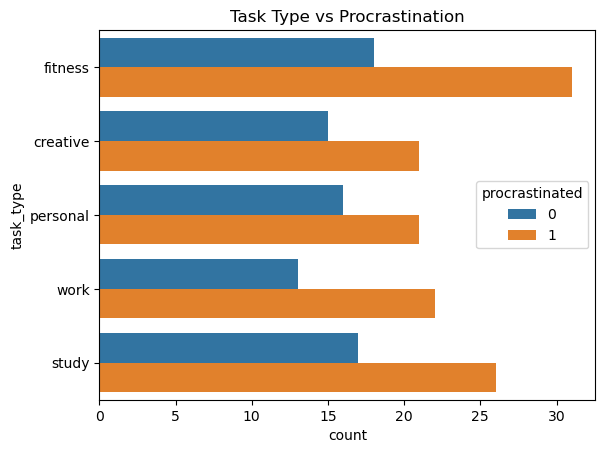

In [16]:
sns.countplot(y='task_type', hue='procrastinated', data=df)
plt.title("Task Type vs Procrastination")
plt.show()


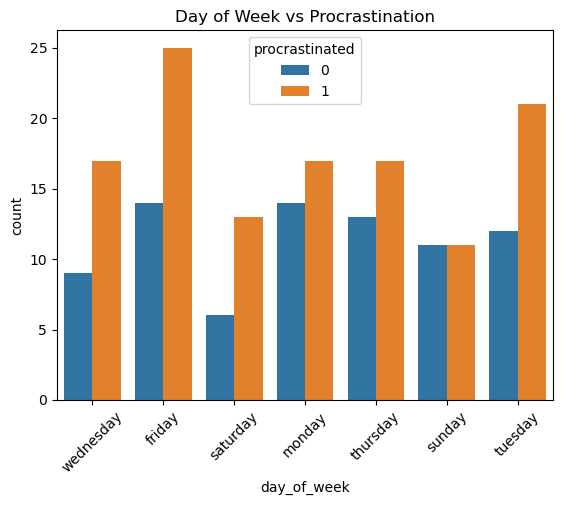

In [17]:
sns.countplot(x='day_of_week', hue='procrastinated', data=df)
plt.xticks(rotation=45)
plt.title("Day of Week vs Procrastination")
plt.show()


In [18]:
df['emotional_load'] = df['stress'] - df['energy']


In [19]:
df['mental_readiness'] = (df['mood'] + df['energy']) / 2


In [20]:
df['social_media_risk'] = (
    (df['used_social_media'] == 1) & 
    (df['post_social_feeling'] <= 3)
).astype(int)


In [21]:
df['emotion_drop'] = df['mood'] - df['post_social_feeling']


In [22]:
df['low_energy'] = (df['energy'] <= 2).astype(int)


In [23]:
df['high_stress'] = (df['stress'] >= 4).astype(int)


In [24]:
df['emotional_overload'] = (
    (df['high_stress'] == 1) & 
    (df['low_energy'] == 1)
).astype(int)


In [25]:
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)


In [26]:
df['procrastination_risk_index'] = (
    df['emotional_load'] +
    df['social_media_risk'] * 2 +
    df['low_energy'] +
    df['high_stress']
)


In [27]:
df.head()


,task_type,task_priority,day_of_week,mood,energy,stress,used_social_media,post_social_feeling,procrastinated,emotional_load,mental_readiness,social_media_risk,emotion_drop,low_energy,high_stress,emotional_overload,is_weekend,procrastination_risk_index
0,fitness,2,wednesday,4,2,1,1,3,1,-1,3.0,1,1,1,0,0,0,2
1,creative,3,friday,1,3,4,0,5,1,1,2.0,0,-4,0,1,0,0,2
2,personal,1,saturday,1,3,2,0,2,0,-1,2.0,0,-1,0,0,0,0,-1
3,creative,1,monday,5,5,2,1,2,1,-3,5.0,1,3,0,0,0,0,-1
4,creative,4,friday,4,5,5,1,5,0,0,4.5,0,-1,0,1,0,0,1


In [28]:
df.shape


(200, 18)

In [29]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier(
    max_depth=4,
    random_state=42
)

tree_model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=4, random_state=42)

In [30]:
y_pred_tree = tree_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_tree))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tree))


Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82        11
           1       0.93      0.93      0.93        29

    accuracy                           0.90        40
   macro avg       0.87      0.87      0.87        40
weighted avg       0.90      0.90      0.90        40



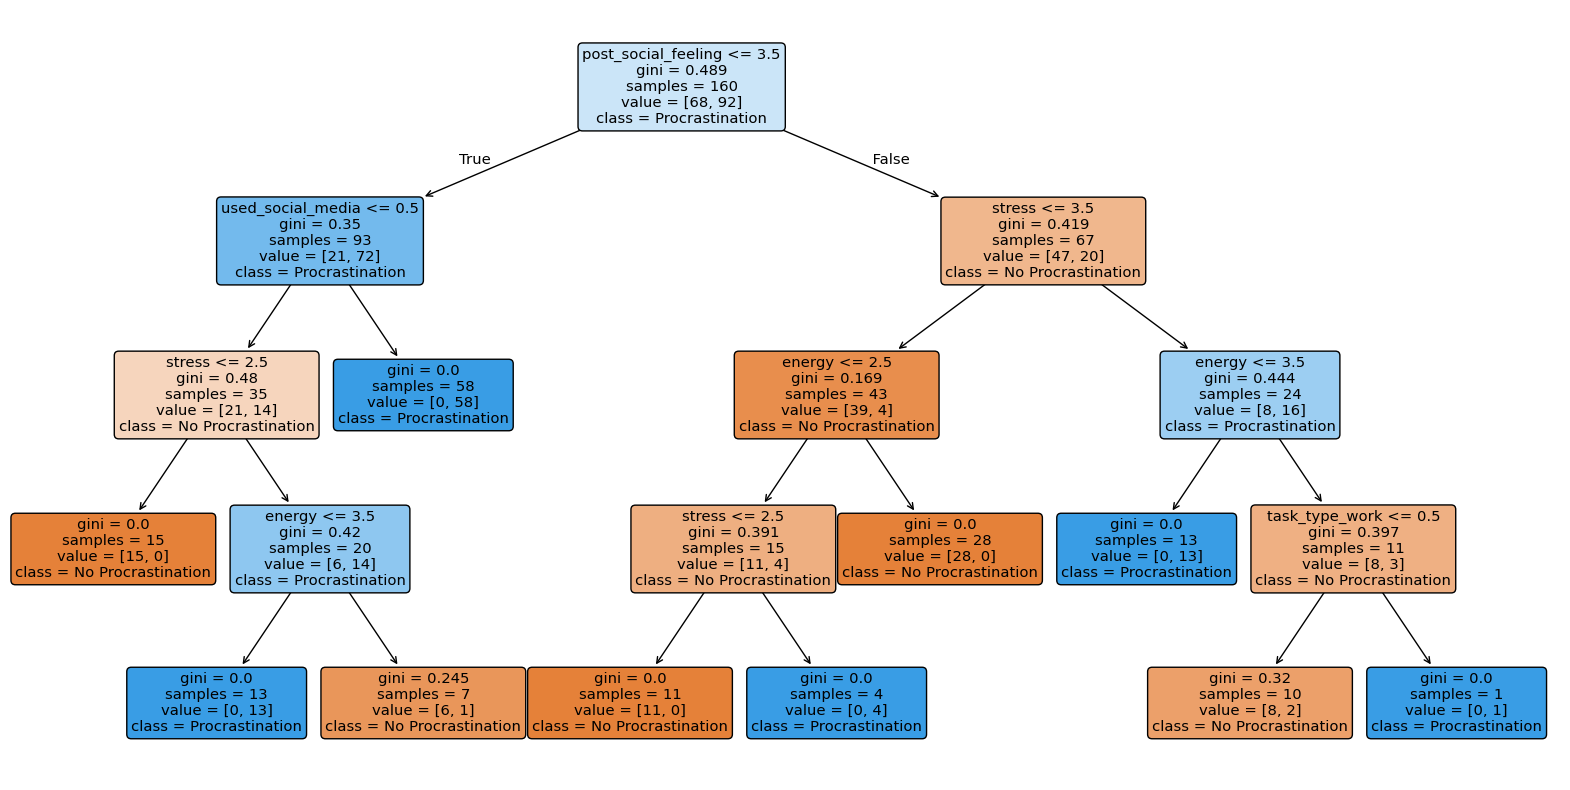

In [31]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    tree_model,
    feature_names=X.columns,
    class_names=['No Procrastination', 'Procrastination'],
    filled=True,
    rounded=True
)
plt.show()


In [32]:
tree_importance = pd.Series(
    tree_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

tree_importance.head(10)


stress                 0.332997
post_social_feeling    0.240486
used_social_media      0.214450
energy                 0.196190
task_type_work         0.015878
task_priority          0.000000
task_type_fitness      0.000000
mood                   0.000000
task_type_personal     0.000000
task_type_study        0.000000
dtype: float64

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=6,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, n_estimators=200, random_state=42)

In [34]:
y_pred_rf = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Accuracy: 0.925

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.96      0.93      0.95        29

    accuracy                           0.93        40
   macro avg       0.90      0.92      0.91        40
weighted avg       0.93      0.93      0.93        40


Confusion Matrix:
 [[10  1]
 [ 2 27]]


In [35]:
rf_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

rf_importance.head(10)


post_social_feeling     0.241187
stress                  0.202497
used_social_media       0.156081
energy                  0.136453
mood                    0.059620
task_priority           0.059483
task_type_work          0.017681
day_of_week_thursday    0.017612
task_type_personal      0.016793
task_type_fitness       0.015966
dtype: float64

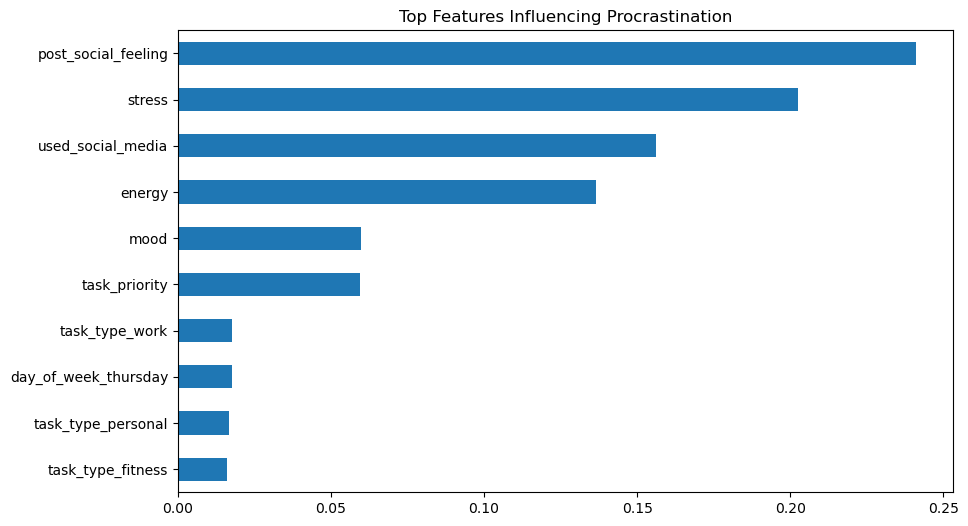

In [36]:
plt.figure(figsize=(10,6))
rf_importance.head(10).plot(kind='barh')
plt.title("Top Features Influencing Procrastination")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
pip install streamlit
